Data Preprocessing with scikit-learn:
---------------------------------------------------
        - Data Preprocessing is a technique that is used to convert the raw data into a clean data set ### Steps:
        - loading the data (reading files)
        - exploring the data (summarizing)
        - cleaning data (handling missing data)
        - transforming data
               - this scikit-learn library includes tools for data preprocessing and data mining

Data Imputation:
-----------------------
         - if the dataset is missing too many values, we just dont use it
         - if only a few of the values are missing, we can perform data imputation to substitute the missing data with      someother value(s).
         - Different methods for data imputation are
           - .using the mean value
           - .using the median value
           - .using the most frequent value
           - .filling the missing value with a constant

### feature scaling

1 Standardizing data:
------------------------------
     - .example: distance (cm,m,km,miles)
     - .Data scientists converts the data into a standard format to make it easier to understand
     - .The standard format refers to data that has 0 mean and unit variance(standard deviation=1), and the process of converting data into this format is called data standardization.
     - .improves the performance of models
     - .It rescales the data to have mean as 0 and variance as 1
     - .formula for this x-mean/standard deviation
1 Data Range:
-------------------
     - .Scale data by compressing it into a fixed range
     - .One of the biggest use cases for compressing data into the range[0,1]
     - .MinMaxScaler
 1 .Normalizing Data:
 ---------------------------
     - .wants to scale the individual data observations(i.e. rows)
     - .Used in data mining and classification related problems
     - .When clustering data we need to apply L2 Normalization
     - . L2 normalization of a row is just the square root of the sum of squared values for the row
1.Robust Scaling:
------------------------
      - .Deals with outliers(data point that is significantly further away from the other data points)
      - .Robustly scale the data i.e. avoid being affected by outliers
      - .Scaling by using data's median and Interquartile range(IQR)
      - .Here mean affected but median remains same
      - .subract the median from each data value then scale to the IQR

In [2]:
from sklearn.impute import SimpleImputer as si
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df=pd.DataFrame({"key1":[45,22,33,np.nan,11],"key2":[30,40,20,20,30],"key3":[22,19,29,12,29]},index=[1,2,3,4,5])

df

,key1,key2,key3
1,45.0,30,22
2,22.0,40,19
3,33.0,20,29
4,NaN,20,12
5,11.0,30,29


In [32]:
df1={"key1":pd.Series([20,30,10,np.nan,10],index=[1,2,3,4,5]),
    "key2":pd.Series([10,20,30,20],index=[1,3,4,5]),
    "key3":pd.Series([29,38,40,38],index=[1,2,3,5])}
df2=pd.DataFrame(df1)
df2

,key1,key2,key3
1,20.0,10.0,29.0
2,30.0,NaN,38.0
3,10.0,20.0,40.0
4,NaN,30.0,NaN
5,10.0,20.0,38.0


In [35]:
st=si(strategy="mean")
st.fit_transform(df2)               

array([[20.  , 10.  , 29.  ],
       [30.  , 20.  , 38.  ],
       [10.  , 20.  , 40.  ],
       [17.5 , 30.  , 36.25],
       [10.  , 20.  , 38.  ]])

In [36]:
df2.mean()

key1    17.50
key2    20.00
key3    36.25
dtype: float64

In [37]:
st=si(strategy="median")
st.fit_transform(df2)     

array([[20., 10., 29.],
       [30., 20., 38.],
       [10., 20., 40.],
       [15., 30., 38.],
       [10., 20., 38.]])

In [38]:
df2.median()

key1    15.0
key2    20.0
key3    38.0
dtype: float64

In [39]:
st=si(strategy="most_frequent")
st.fit_transform(df2)     

array([[20., 10., 29.],
       [30., 20., 38.],
       [10., 20., 40.],
       [10., 30., 38.],
       [10., 20., 38.]])

In [41]:
st=si(strategy="constant",fill_value=-1)
st.fit_transform(df2)     

array([[20., 10., 29.],
       [30., -1., 38.],
       [10., 20., 40.],
       [-1., 30., -1.],
       [10., 20., 38.]])

####  standardizing data

In [43]:
d=pd.read_csv("Advertising.csv")
d

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [46]:
d.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


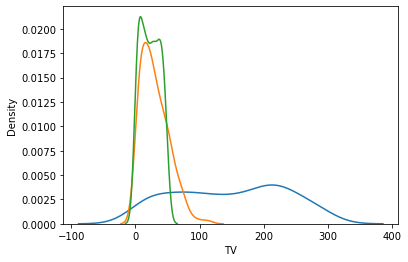

In [50]:
import seaborn as sns
sns.kdeplot(d["TV"])
sns.kdeplot(d["newspaper"])
sns.kdeplot(d["radio"])

plt.show()

In [55]:
d["TV"].mean()

147.0425

In [56]:
d["TV"].std()

85.8542363149081

In [58]:
# std_data  = (x - mean(x))/std(x)
(d["TV"][0]-d["TV"].mean()) / d["TV"].std()      #(230.1-147.0425)/85.84

0.9674245973763037

In [59]:
from sklearn.preprocessing import scale
s=scale(d)
s

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [65]:
scale=pd.DataFrame(s,columns=d.columns)
scale.head(5)

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


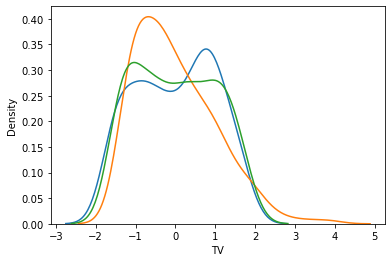

In [66]:
sns.kdeplot(scale["TV"])
sns.kdeplot(scale["newspaper"])
sns.kdeplot(scale["radio"])

plt.show()

In [68]:
scale.mean().round()

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [69]:
scale.std().round()

TV           1.0
radio        1.0
newspaper    1.0
sales        1.0
dtype: float64

In [70]:
d.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [71]:
d.std()

TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64